# Prototype prism

This notebook presents a general approach for implementing the gravitational potential and the vertical component of the gravitational acceleration produced by a rectangular prism by using the analytical formulas of Nagy et al (2000, 2002). This prototype is highly inspired on [Harmonica](https://www.fatiando.org/harmonica/latest/index.html) (Uieda et al, 2020). It makes use of the modified arctangent function proposed by Fukushima (2020, eq. 72) and of a modified logarithm function for dealing with singularities at some computation points.

* Nagy, D., Papp, G., and Benedek, J. (2000). The gravitational potential and its derivatives for the prism: Journal of Geodesy, 74, 552–560, http://doi.org/10.1007/s001900000116.
* Nagy, D., Papp, G., and Benedek, J. (2002). Corrections to "The gravitational potential and its derivatives for the prism": Journal of Geodesy, 76, 475, http://doi.org/10.1007/s00190-002-0264-7
* Fukushima, T. (2020). Speed and accuracy improvements in standard algorithm for prismatic gravitational field. Geophysical Journal International, 222(3), 1898–1908. http://doi.org/10.1093/gji/ggaa240 
* Uieda, Leonardo, Soler, Santiago R., Pesce, Agustina, Oliveira Jr, Vanderlei C, and Shea, Nicholas. (2020, February 27). Harmonica: Forward modeling, inversion, and processing gravity and magnetic data (Version v0.1.0). Zenodo. http://doi.org/10.5281/zenodo.3628742

In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

In [2]:
import prism

In [3]:
# Create a set of computation points
shape = (30, 30)
y = np.linspace(-5000, 5000, shape[0])
x = np.linspace(-7000, 3000, shape[1])
y, x = np.meshgrid(y, x)

y = np.ravel(y)
x = np.ravel(x)
z = np.zeros_like(y) - 150

coordinates = np.vstack([y, x, z])
print(coordinates.shape)

y[:shape[0]:]

x[::shape[1]]

(3, 900)


array([-7000.        , -6655.17241379, -6310.34482759, -5965.51724138,
       -5620.68965517, -5275.86206897, -4931.03448276, -4586.20689655,
       -4241.37931034, -3896.55172414, -3551.72413793, -3206.89655172,
       -2862.06896552, -2517.24137931, -2172.4137931 , -1827.5862069 ,
       -1482.75862069, -1137.93103448,  -793.10344828,  -448.27586207,
        -103.44827586,   241.37931034,   586.20689655,   931.03448276,
        1275.86206897,  1620.68965517,  1965.51724138,  2310.34482759,
        2655.17241379,  3000.        ])

In [4]:
# Create a model formed by prisms
model = np.array([[-3000, -2500, -4000, -3000, 500, 1300],
                  [ 1800,  2350,    10,  2500, 300, 1000]])

density = np.array([1000, 1200])

In [5]:
# Compute the gravitational potential
U = prism.grav(coordinates=coordinates, 
               prisms=model, 
               density=density, 
               field='g_potential')

In [6]:
# Compute the vertical component of acceleration
gz = prism.grav(coordinates=coordinates, 
                prisms=model, 
                density=density, 
                field='g_z')

In [7]:
# Compute the x-component of acceleration
gx = prism.grav(coordinates=coordinates, 
                prisms=model, 
                density=density, 
                field='g_x')

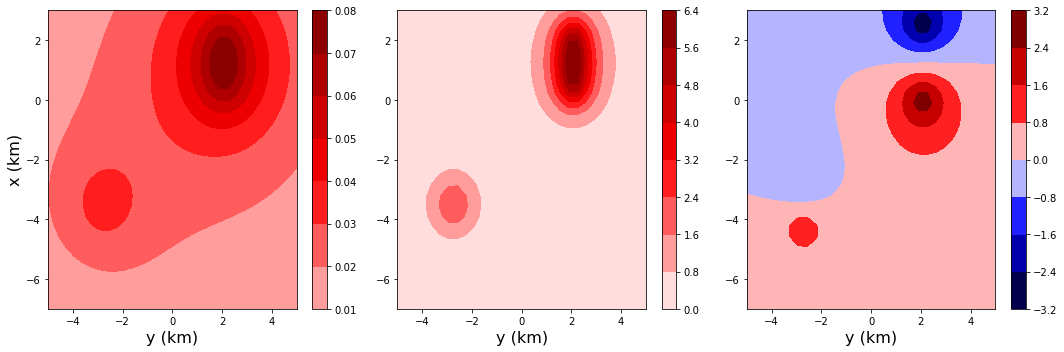

In [8]:
# Plot the results
plt.figure(figsize=(15,5))

plt.subplot(131)
ranges = np.max(np.abs(U))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, U.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.ylabel('x (km)', fontsize=16)
plt.xlabel('y (km)', fontsize=16)

plt.subplot(132)
ranges = np.max(np.abs(gz))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, gz.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (km)', fontsize=16)

plt.subplot(133)
ranges = np.max(np.abs(gx))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, gx.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (km)', fontsize=16)

plt.tight_layout()

plt.show()